In [116]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df_transfer_news=pd.read_csv("90minFootballTransferNewsNLP.csv")

In [103]:
df_transfer_news.head()

,Title,Date,Link,Content
0,Football transfer rumours: Why Maguire's Man U...,"Aug 15, 2023",https://www.90min.com/posts/football-transfer-...,"90minÂ rounds up the latestÂ transfer news, ru..."
1,Chelsea agree Romeo Lavia fee with Southampton,"Aug 15, 2023",https://www.90min.com/posts/chelsea-agree-rome...,Chelsea have finalised an agreement with South...
2,Harry Maguire's proposed West Ham transfer col...,"Aug 15, 2023",https://www.90min.com/posts/harry-maguire-prop...,Harry Maguire's proposed transfer to West Ham ...
3,Southampton director breaks down Chelsea & Liv...,"Aug 15, 2023",https://www.90min.com/posts/southampton-direct...,Southampton director Jason Wilcox has revealed...
4,Neymar completes move from PSG to Al Hilal,"Aug 15, 2023",https://www.90min.com/posts/neymar-completes-m...,Saudi Pro League side Al Hilal have confirmed ...


## Labelling

### Text blob

In [104]:
def polarity(text):
    text=text.lower()
    text=TextBlob(text)
    text=text.sentiment.polarity
    return text

In [105]:
df_transfer_news["Polarity"]=df_transfer_news["Title"].apply(polarity)

In [108]:
def labelling(polarity):
    if polarity >=1:
        return "Positive"
    if polarity >=0:
        return "Neutral"
    if polarity <0:
        return "Negative"


In [109]:
df_transfer_news=df_transfer_news[["Title","Polarity"]]

In [110]:
df_transfer_news["Sentiment"]=df_transfer_news["Polarity"].apply(labelling)

C:\Users\Reza\AppData\Local\Temp\ipykernel_8404\523992033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transfer_news["Sentiment"]=df_transfer_news["Polarity"].apply(labelling)


In [112]:
df_transfer_news.Sentiment.unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

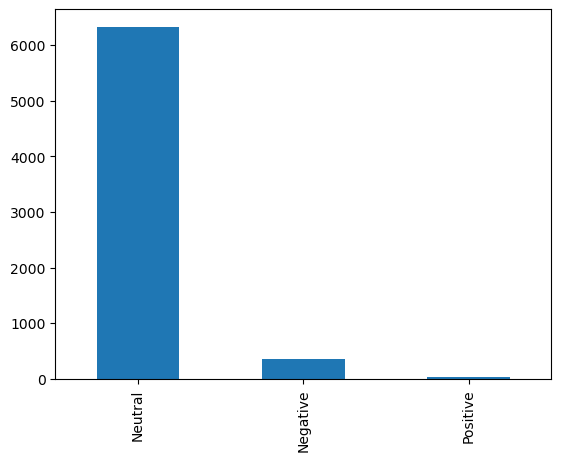

In [115]:
df_transfer_news.Sentiment.value_counts().plot.bar();

Vader Sentiment (not use)

In [ ]:
# analyzer = SentimentIntensityAnalyzer()
# def labelling(text):
#     text=text.lower()
#     text=analyzer.polarity_scores(text)
#     text.pop('compound')
#     text=max(text,key=text.get)
#     return text